Task 1

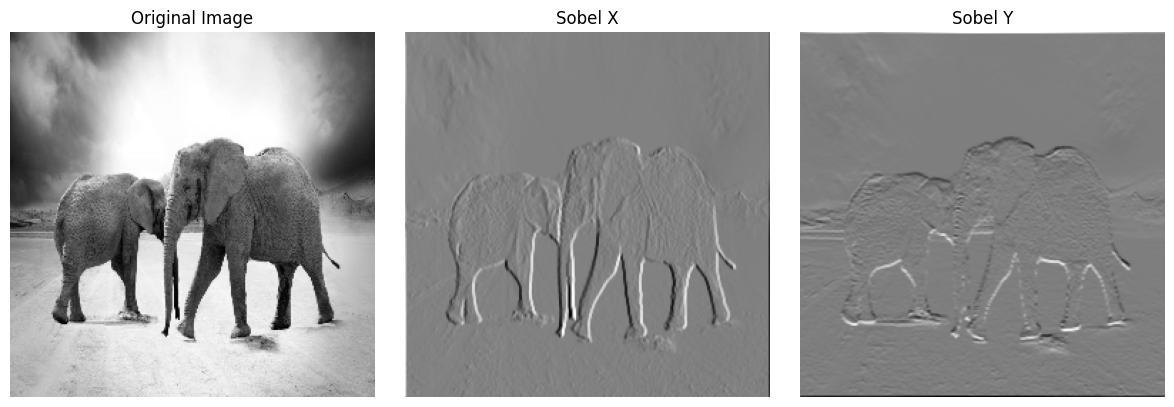

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load grayscale image
image = cv2.imread('negative-space-grayscale-elephant-animals-africa-pixabay-thumb-1.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))
image = image.astype(np.float32) / 255.0  # Normalize

# (batch, height, width, channels)
image_tensor = tf.expand_dims(tf.expand_dims(image, axis=0), axis=-1)

# Define Sobel X and Y filters
sobel_x = tf.constant([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=tf.float32)

sobel_y = tf.constant([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=tf.float32)

# Reshape for tf.nn.conv2d
sobel_x = tf.reshape(sobel_x, [3, 3, 1, 1])
sobel_y = tf.reshape(sobel_y, [3, 3, 1, 1])

# Apply convolutions
edge_x = tf.nn.conv2d(image_tensor, sobel_x, strides=1, padding='SAME')
edge_y = tf.nn.conv2d(image_tensor, sobel_y, strides=1, padding='SAME')

# Plot original and Sobel edge maps
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(edge_x), cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(edge_y), cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.tight_layout()
plt.show()

Task 2

In [4]:
# Create a 4x4 random matrix
np.random.seed(1)
rand_matrix = np.random.randint(0, 10, size=(1, 4, 4, 1)).astype(np.float32)
input_tensor = tf.convert_to_tensor(rand_matrix)

# Apply 2x2 Max Pooling
max_pool = tf.nn.pool(input_tensor, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='VALID')

# Apply 2x2 Average Pooling
avg_pool = tf.nn.pool(input_tensor, window_shape=(2, 2), pooling_type='AVG', strides=(2, 2), padding='VALID')

# Print results
print("Original 4x4 Matrix:\n", rand_matrix.squeeze())
print("\nMax Pooled Matrix:\n", max_pool.numpy().squeeze())
print("\nAverage Pooled Matrix:\n", avg_pool.numpy().squeeze())

Original 4x4 Matrix:
 [[5. 8. 9. 5.]
 [0. 0. 1. 7.]
 [6. 9. 2. 4.]
 [5. 2. 4. 2.]]

Max Pooled Matrix:
 [[8. 9.]
 [9. 4.]]

Average Pooled Matrix:
 [[3.25 5.5 ]
 [5.5  3.  ]]
